In [1]:
import tensorflow as tf

from keras import optimizers
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.applications import ResNet50, DenseNet201
from keras.applications import resnet, densenet

import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
import pandas as pd

In [2]:
train_path = "data/train"
valid_path = "data/valid"
test_path = "data/test"

In [3]:
image_shape = (305,430,3)
N_CLASSES = 4
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']


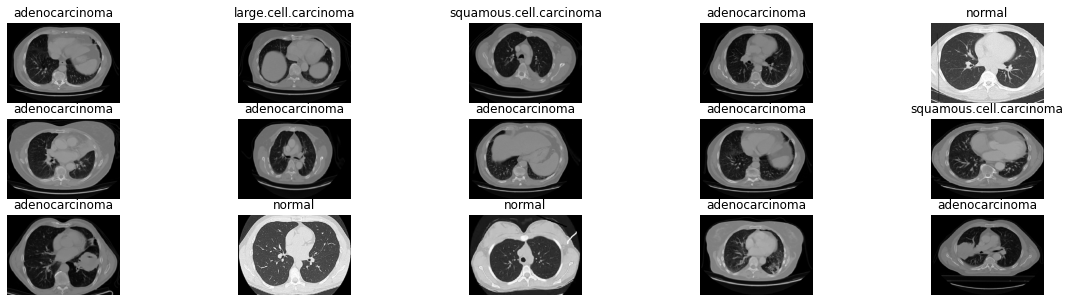

In [4]:
class_names=list(test_generator.class_indices.keys())
print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_generator[1]
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label_batch[i])])


In [5]:
first_model = Sequential([
  Conv2D(8, 2, padding='same', activation='relu', input_shape = image_shape),
  MaxPooling2D(2),
  Conv2D(16, 2, padding='same', activation='relu'),
  MaxPooling2D(2),

  Dropout(0.4),
  Flatten(),
  Dense(256, activation='relu'),
  Dropout(0.4),
  Dense(4, activation='softmax')
])
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 305, 430, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 152, 215, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 152, 215, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 76, 107, 16)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 76, 107, 16)       0         
                                                                 
 flatten (Flatten)           (None, 130112)            0

In [6]:
checkpointer = ModelCheckpoint('chestmodel.hdf5',verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 10)
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)

first_model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['acc'])
history = first_model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 20,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 1.3019 - acc: 0.3638
Epoch 1: val_loss improved from inf to 1.33510, saving model to chestmodel.hdf5
20/20 [==============================] - 37s 2s/step - loss: 1.3019 - acc: 0.3638 - val_loss: 1.3351 - val_acc: 0.3889
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 1.1889 - acc: 0.4698
Epoch 2: val_loss improved from 1.33510 to 1.30384, saving model to chestmodel.hdf5
20/20 [==============================] - 35s 2s/step - loss: 1.1889 - acc: 0.4698 - val_loss: 1.3038 - val_acc: 0.4583
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.0891 - acc: 0.5285
Epoch 3: val_loss improved from 1.30384 to 1.18243, saving model to chestmodel.hdf5
20/20 [==============================] - 36s 2s/step - loss: 1.0891 - acc: 0.5285 - val_loss: 1.1824 - val_acc: 0.4306
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 1.0405 - acc: 0.5856
Epoch 4: val_loss did not improve from 

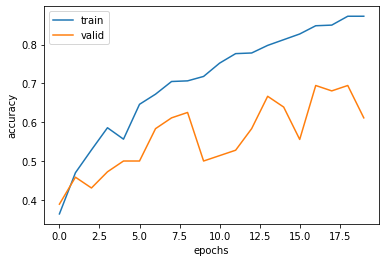

In [7]:
plt.plot(history.history['acc'], label = 'train',)
plt.plot(history.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [8]:
result = first_model.evaluate(test_generator)

10/10 [==============================] - 8s 825ms/step - loss: 1.0265 - acc: 0.4635


In [9]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [10]:
dense_model = DenseNet201(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))

# make all layers except conv5 layers not trainable
for layer in dense_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

In [11]:
densenet_model = Sequential()
densenet_model.add(dense_model)
densenet_model.add(Flatten())
densenet_model.add(BatchNormalization())
densenet_model.add(Dense(N_CLASSES, activation='softmax'))
densenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 4)                 7684      
                                                                 
Total params: 18,337,348
Trainable params: 6,990,084
Non-trainable params: 11,347,264
_________________________________________________________________


In [12]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
densenet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

checkpointer = ModelCheckpoint(filepath='./chestmodel-DenseNet201.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [13]:
history_dense = densenet_model.fit(train_generator,
                                steps_per_epoch = 20,
                                epochs = 50,
                                verbose = 1,
                                validation_data = valid_generator,
                                callbacks = [checkpointer, early_stopping])

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 1.2746 - acc: 0.4241 
Epoch 1: val_loss improved from inf to 1.35903, saving model to .\chestmodel-DenseNet201.hdf5
20/20 [==============================] - 708s 34s/step - loss: 1.2746 - acc: 0.4241 - val_loss: 1.3590 - val_acc: 0.3056
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.7516 - acc: 0.7096 
Epoch 2: val_loss improved from 1.35903 to 1.25306, saving model to .\chestmodel-DenseNet201.hdf5
20/20 [==============================] - 642s 32s/step - loss: 0.7516 - acc: 0.7096 - val_loss: 1.2531 - val_acc: 0.3611
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.5307 - acc: 0.8548 
Epoch 3: val_loss improved from 1.25306 to 1.16742, saving model to .\chestmodel-DenseNet201.hdf5
20/20 [==============================] - 630s 33s/step - loss: 0.5307 - acc: 0.8548 - val_loss: 1.1674 - val_acc: 0.4306
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.3911 - 

Epoch 28/50
20/20 [==============================] - ETA: 0s - loss: 0.0199 - acc: 1.0000 
Epoch 28: val_loss improved from 0.30986 to 0.30104, saving model to .\chestmodel-DenseNet201.hdf5
20/20 [==============================] - 638s 32s/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.3010 - val_acc: 0.9167
Epoch 29/50
20/20 [==============================] - ETA: 0s - loss: 0.0254 - acc: 0.9967 
Epoch 29: val_loss did not improve from 0.30104
20/20 [==============================] - 594s 30s/step - loss: 0.0254 - acc: 0.9967 - val_loss: 0.3020 - val_acc: 0.9167
Epoch 30/50
20/20 [==============================] - ETA: 0s - loss: 0.0179 - acc: 0.9984 
Epoch 30: val_loss improved from 0.30104 to 0.28376, saving model to .\chestmodel-DenseNet201.hdf5
20/20 [==============================] - 602s 30s/step - loss: 0.0179 - acc: 0.9984 - val_loss: 0.2838 - val_acc: 0.9306
Epoch 31/50
20/20 [==============================] - ETA: 0s - loss: 0.0161 - acc: 1.0000 
Epoch 31: val_loss improved

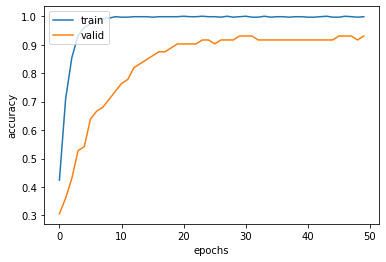

In [14]:
plt.plot(history_dense.history['acc'], label = 'train',)
plt.plot(history_dense.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [15]:
dns_result = densenet_model.evaluate(test_generator)

10/10 [==============================] - 260s 26s/step - loss: 0.6689 - acc: 0.7587


In [16]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [17]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))

# make all layers except conv5 layers not trainable
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

In [18]:
resnet_model = Sequential()
resnet_model.add(res_model)
resnet_model.add(Dropout(0.4))
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.4))
resnet_model.add(Dense(N_CLASSES, activation='softmax'))
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                 8196      
                                                      

In [19]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)
resnet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [20]:
checkpointer = ModelCheckpoint(filepath='./finalmodel-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=20)

In [21]:
history_res = resnet_model.fit(train_generator,
                            steps_per_epoch = 20,
                            epochs = 120,
                            verbose = 1,
                            validation_data = valid_generator,
                            callbacks = [checkpointer, early_stopping])

Epoch 1/120
20/20 [==============================] - ETA: 0s - loss: 1.9557 - acc: 0.3230 
Epoch 1: val_loss improved from inf to 1.33971, saving model to .\finalmodel-ResNet50.hdf5
20/20 [==============================] - 532s 26s/step - loss: 1.9557 - acc: 0.3230 - val_loss: 1.3397 - val_acc: 0.3333
Epoch 2/120
20/20 [==============================] - ETA: 0s - loss: 1.4095 - acc: 0.4682 
Epoch 2: val_loss improved from 1.33971 to 1.19159, saving model to .\finalmodel-ResNet50.hdf5
20/20 [==============================] - 521s 26s/step - loss: 1.4095 - acc: 0.4682 - val_loss: 1.1916 - val_acc: 0.4028
Epoch 3/120
20/20 [==============================] - ETA: 0s - loss: 1.2018 - acc: 0.5710 
Epoch 3: val_loss improved from 1.19159 to 1.07681, saving model to .\finalmodel-ResNet50.hdf5
20/20 [==============================] - 508s 25s/step - loss: 1.2018 - acc: 0.5710 - val_loss: 1.0768 - val_acc: 0.4722
Epoch 4/120
20/20 [==============================] - ETA: 0s - loss: 1.0002 - acc: 

20/20 [==============================] - 489s 25s/step - loss: 0.0566 - acc: 0.9853 - val_loss: 0.3914 - val_acc: 0.8611
Epoch 29/120
20/20 [==============================] - ETA: 0s - loss: 0.0586 - acc: 0.9837 
Epoch 29: val_loss did not improve from 0.36980
20/20 [==============================] - 517s 26s/step - loss: 0.0586 - acc: 0.9837 - val_loss: 0.3775 - val_acc: 0.8750
Epoch 30/120
20/20 [==============================] - ETA: 0s - loss: 0.0459 - acc: 0.9853 
Epoch 30: val_loss improved from 0.36980 to 0.36845, saving model to .\finalmodel-ResNet50.hdf5
20/20 [==============================] - 519s 26s/step - loss: 0.0459 - acc: 0.9853 - val_loss: 0.3685 - val_acc: 0.8750
Epoch 31/120
20/20 [==============================] - ETA: 0s - loss: 0.0332 - acc: 0.9967 
Epoch 31: val_loss improved from 0.36845 to 0.36685, saving model to .\finalmodel-ResNet50.hdf5
20/20 [==============================] - 510s 27s/step - loss: 0.0332 - acc: 0.9967 - val_loss: 0.3668 - val_acc: 0.8611


Epoch 58/120
20/20 [==============================] - ETA: 0s - loss: 0.0133 - acc: 0.9951 
Epoch 58: val_loss did not improve from 0.27154
20/20 [==============================] - 542s 28s/step - loss: 0.0133 - acc: 0.9951 - val_loss: 0.2894 - val_acc: 0.9167
Epoch 59/120
20/20 [==============================] - ETA: 0s - loss: 0.0169 - acc: 0.9967 
Epoch 59: val_loss did not improve from 0.27154
20/20 [==============================] - 513s 27s/step - loss: 0.0169 - acc: 0.9967 - val_loss: 0.2902 - val_acc: 0.9167
Epoch 60/120
20/20 [==============================] - ETA: 0s - loss: 0.0192 - acc: 0.9951 
Epoch 60: val_loss did not improve from 0.27154
20/20 [==============================] - 540s 28s/step - loss: 0.0192 - acc: 0.9951 - val_loss: 0.3008 - val_acc: 0.9028
Epoch 61/120
20/20 [==============================] - ETA: 0s - loss: 0.0192 - acc: 0.9935 
Epoch 61: val_loss did not improve from 0.27154
20/20 [==============================] - 517s 26s/step - loss: 0.0192 - acc: 

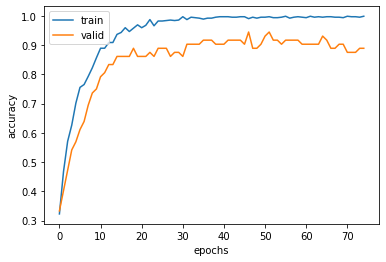

In [22]:
plt.plot(history_res.history['acc'], label = 'train',)
plt.plot(history_res.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [23]:
result = resnet_model.evaluate(test_generator)

10/10 [==============================] - 190s 20s/step - loss: 0.6706 - acc: 0.8254


In [24]:
from keras.models import load_model
resnet50_model = load_model('finalmodel-ResNet50.hdf5')

In [25]:
paths = ["data/test/adenocarcinoma/", "data/test/large.cell.carcinoma/", "data/test/normal/", "data/test/squamous.cell.carcinoma/"]
results = {"adeno":{0:0, 1:0, 2:0, 3:0},
            "large":{0:0, 1:0, 2:0, 3:0},
            "normal":{0:0, 1:0, 2:0, 3:0},
            "squamous":{0:0, 1:0, 2:0, 3:0}}

for path, key in zip(paths, results.keys()):
    
    for file in os.listdir(path):
        img = tf.keras.utils.load_img(
            (path + file), target_size=(460, 460)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        prediction = resnet50_model.predict(img_array, verbose=0)
        results[key][np.argmax(prediction)] = results.get(key).get(np.argmax(prediction),0) + 1

results

{'adeno': {0: 70, 1: 9, 2: 1, 3: 40},
 'large': {0: 8, 1: 36, 2: 0, 3: 7},
 'normal': {0: 0, 1: 0, 2: 54, 3: 0},
 'squamous': {0: 2, 1: 1, 2: 0, 3: 87}}

In [26]:
df = pd.DataFrame(results)

print("Overall accuracy is : {:.2f}%\n".format((df["adeno"][0] + df["large"][1] + df["normal"][2] + df["squamous"][3]) / 315 * 100))

print("Adeno cancer detection accuracy is : {:.2f}%".format(df["adeno"][0] / df["adeno"].sum() * 100))
print("Large cell cancer detection accuracy is : {:.2f}%".format(df["large"][1] / df["large"].sum() * 100))
print("Normal chest detection accuracy is : {:.2f}%".format(df["normal"][2] / df["normal"].sum() * 100))
print("Squamous cell cancer detection accuracy is : {:.2f}%".format(df["squamous"][3] / df["squamous"].sum() * 100))

print("\nConfusion Matrix :")
df.transpose()

Overall accuracy is : 78.41%

Adeno cancer detection accuracy is : 58.33%
Large cell cancer detection accuracy is : 70.59%
Normal chest detection accuracy is : 100.00%
Squamous cell cancer detection accuracy is : 96.67%

Confusion Matrix :


,0,1,2,3
adeno,70,9,1,40
large,8,36,0,7
normal,0,0,54,0
squamous,2,1,0,87


In [38]:
confusion_matrix = df.transpose()

import numpy as np

confusion_matrix = np.array(confusion_matrix)

precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)

recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

f1_score = 2 * precision * recall / (precision + recall)

row_names = ["adeno", "large", "normal", "squamous"]
for i in range(len(row_names)):
    print(f"Class {row_names[i]}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F1 score = {f1_score[i]:.2f}")

Class adeno: Precision = 0.88, Recall = 0.58, F1 score = 0.70
Class large: Precision = 0.78, Recall = 0.71, F1 score = 0.74
Class normal: Precision = 0.98, Recall = 1.00, F1 score = 0.99
Class squamous: Precision = 0.65, Recall = 0.97, F1 score = 0.78


In [27]:
img_path = "data/test/squamous.cell.carcinoma/000111.png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 1s 584ms/step
This image most likely belongs to squamous.cell.carcinoma with a 99.79 percent confidence.


In [28]:
img_path = "data/test/adenocarcinoma/000115.png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 1s 680ms/step
This image most likely belongs to squamous.cell.carcinoma with a 53.72 percent confidence.


In [29]:
img_path = "data/test/large.cell.carcinoma/000126.png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 1s 513ms/step
This image most likely belongs to large.cell.carcinoma with a 96.75 percent confidence.


In [30]:
img_path = "data/medical/Normal/001.PNG"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 1s 887ms/step
This image most likely belongs to normal with a 68.16 percent confidence.


In [31]:
img_path = "data/medical/Adenocarcinoma/001.PNG"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 1s 507ms/step
This image most likely belongs to normal with a 75.96 percent confidence.


In [33]:
img_path = "data/medical/Large cell/001.PNG"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 1s 505ms/step
This image most likely belongs to normal with a 76.32 percent confidence.


In [34]:
img_path = "data/medical/Squamous/001.PNG"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 0s 476ms/step
This image most likely belongs to normal with a 98.20 percent confidence.
